In [1]:
# import packages

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.neural_network import MLPClassifier
from time import perf_counter
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
#from six import six
#from sklearn.externals import six
#import sys
#sys.modules['sklearn.externals.six'] - six
import mlrose_hiive
from sklearn.model_selection import cross_val_score


In [3]:
pip install --upgrade joblib==1.2.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.metrics import jaccard_score


In [3]:
# upload dataset
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
wisc_features = pd.DataFrame(bc.data, columns = bc.feature_names)
wisc_target = pd.DataFrame(bc.target, columns=['target'])
wisc_target['target'].value_counts()

# form final dataset
cancer = pd.concat([wisc_features, wisc_target], axis=1)
cancer.head()

# type of each variable
print("\nType of Each Variable:\n",cancer.dtypes)

1    357
0    212
Name: target, dtype: int64

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Type of Each Variable:
 mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       flo

In [4]:
# check for balance in dataset
target_count = cancer['target'].value_counts()
print('Distribution:', target_count)

total_samples = len(cancer)
class_balance_percentage = target_count / total_samples * 100
print("Class balance percentage:\n", class_balance_percentage)

Distribution: 1    357
0    212
Name: target, dtype: int64
Class balance percentage:
 1    62.741652
0    37.258348
Name: target, dtype: float64


In [5]:
def calculate_gini_index(class_distribution):
 
    gini_index = 1.0  # Initialize the Gini index

    for count in target_count:
        proportion = count / total_samples
        gini_index -= proportion ** 2

    return gini_index


# Calculate the Gini index
gini_index = calculate_gini_index(target_count)
print("Gini index:", gini_index)


Gini index: 0.46753006075469244


In [4]:
# split dataset
np.random.seed(42)
X = cancer.iloc[:,:-1]
y = cancer['target']

# scale 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split data into test and train tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Train set:', X_train.shape, y_train. shape)
print('Test set:', X_test.shape, y_test. shape)


# split train set into train and validation set
#X_train2W, X_valW, y_train2W, y_valW = train_test_split(X_trainW, y_trainW, test_size=0.2, random_state=0)

# data structures to store values later 
#wisc_numclassifiers = 5
#best_accuracy = np.zeros(wisc_numclassifiers)
#train_time = np.zeros(wisc_numclassifiers)
#test_time = np.zeros(wisc_numclassifiers)


Train set: (455, 30) (455,)
Test set: (114, 30) (114,)


In [113]:
# MLPClassifier - ReLU activation
# using best NN parameters from A1
np.random.seed(42)
clf = MLPClassifier(hidden_layer_sizes = 1, activation ='relu', learning_rate_init = 0.01, random_state = 0)
time_start = perf_counter()
clf.fit(X_train, y_train)
fit_time = perf_counter() - time_start
print(f'Train: fit_time = {fit_time}')

time_start = perf_counter()
yhat = clf.predict(X_test)
fit_time = perf_counter() - time_start
print (f'Test: fit_time = {fit_time}')

#Evaulation
jaccard = jaccard_score(y_test, yhat)
print("\nJaccard Index:",jaccard)
print (classification_report(y_test, yhat))

# accuracy
accuracy = accuracy_score(y_test, yhat)
print("accuracy:", accuracy)

MLPClassifier(hidden_layer_sizes=1, learning_rate_init=0.01, random_state=0)

Train: fit_time = 0.3191100000112783
Test: fit_time = 0.0007663000142201781

Jaccard Index: 0.9420289855072463
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

accuracy: 0.9649122807017544


In [114]:
# MLPClassifier - Sigmoid function activation
# using best NN parameters from A1
np.random.seed(42)
clf = MLPClassifier(hidden_layer_sizes = 1, activation ='logistic', learning_rate_init = 0.01, random_state = 0)
time_start = perf_counter()
clf.fit(X_train, y_train)
fit_time = perf_counter() - time_start
print(f'Train: fit_time = {fit_time}')

time_start = perf_counter()
yhat = clf.predict(X_test)
fit_time = perf_counter() - time_start
print (f'Test: fit_time = {fit_time}')

#Evaulation
jaccard = jaccard_score(y_test, yhat)
print("\nJaccard Index:",jaccard)
print (classification_report(y_test, yhat))

# accuracy
accuracy = accuracy_score(y_test, yhat)
print("accuracy:", accuracy)

MLPClassifier(activation='logistic', hidden_layer_sizes=1,
              learning_rate_init=0.01, random_state=0)

Train: fit_time = 0.2418937000038568
Test: fit_time = 0.0013795999984722584

Jaccard Index: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

accuracy: 0.956140350877193


NeuralNetwork(algorithm='simulated_annealing', curve=True,
              hidden_nodes=[50, 30], learning_rate=0.001, max_attempts=100,
              max_iters=1000, random_state=0)

fit_time = 6.416648000002169
[[   4.8214586     3.        ]
 [   4.82156928    5.        ]
 [   4.82158918    7.        ]
 ...
 [   4.82472983 1988.        ]
 [   4.82441353 1990.        ]
 [   4.82425027 1992.        ]]


NeuralNetwork(clip_max=5, curve=True, early_stopping=True, hidden_nodes=[10],
              learning_rate=0.01, max_attempts=100, max_iters=1000,
              random_state=42)

fit_time for random_hill_climb: 3.1002490999817383
Accuracy for random_hill_climb: 0.49122807017543857


NeuralNetwork(algorithm='genetic_alg', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[10], learning_rate=0.01,
              max_attempts=100, max_iters=1000, random_state=42)

fit_time for genetic_alg: 78.34853700001258
Accuracy for genetic_alg: 0.9473684210526315


NeuralNetwork(algorithm='simulated_annealing', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[10], learning_rate=0.01,
              max_attempts=100, max_iters=1000, random_state=42)

fit_time for simulated_annealing: 6.5297183000075165
Accuracy for simulated_annealing: 0.4298245614035088


NeuralNetwork(algorithm='gradient_descent', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[10], learning_rate=0.01,
              max_attempts=100, max_iters=1000, random_state=42)

fit_time for gradient_descent: 6.468064800021239
Accuracy for gradient_descent: 0.9385964912280702


<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Fitness Value')

Text(0.5, 1.0, 'Fitness Curves with ReLU Activation')

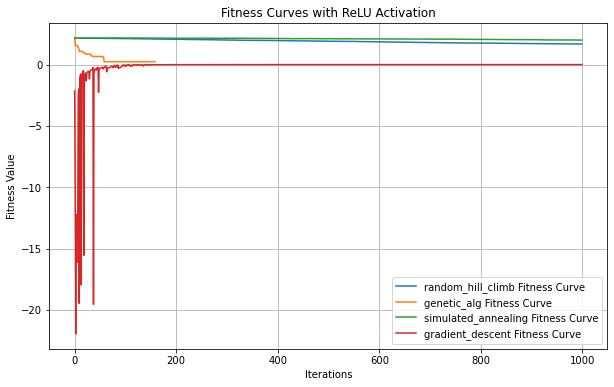

Accuracy for random_hill_climb: 0.9385964912280702
Accuracy for genetic_alg: 0.9385964912280702
Accuracy for simulated_annealing: 0.9385964912280702
Accuracy for gradient_descent: 0.9385964912280702


In [118]:
init_state = np.random.randint(2, size=50)
np.random.seed(42)

# train different models
algorithms = ['random_hill_climb', 'genetic_alg', 'simulated_annealing', 'gradient_descent']
fitness_curves = []
accuracy_scores = []


for algo in algorithms:
    np.random.seed(42)
    # obtain time
    time_start = perf_counter()
    model = mlrose_hiive.NeuralNetwork(
        hidden_nodes=[10], activation='relu', algorithm=algo, max_iters=1000, bias=True,
        is_classifier=True, learning_rate=0.01, early_stopping=True, clip_max=5, max_attempts=100, random_state=42, curve=True
    )
    model.fit(X_train, y_train)
    fit_time = perf_counter() - time_start
    print(f'fit_time for {algo}: {fit_time}')
    
    fitness_curve = model.fitness_curve
    fitness_curves.append(fitness_curve)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Accuracy for {algo}: {accuracy}')


# Plot the fitness curves for different algorithms
plt.figure(figsize=(10, 6))
#for i, algo in enumerate(algorithms):
 #   plt.plot(fitness_curves[i], label=f'{algo} Fitness Curve')
for i, algo in enumerate(algorithms):
    if algo in ['random_hill_climb', 'genetic_alg', 'simulated_annealing']:
        plt.plot(fitness_curves[i][:, 0], label=f'{algo} Fitness Curve')
    else:
        plt.plot(fitness_curves[i], label=f'{algo} Fitness Curve')
plt.xlabel('Iterations')
plt.ylabel('Fitness Value')
plt.title('Fitness Curves with ReLU Activation')
plt.legend()
plt.grid(True)
plt.show()

 



NeuralNetwork(activation='sigmoid', clip_max=5, curve=True, early_stopping=True,
              hidden_nodes=[10], learning_rate=0.01, max_attempts=100,
              max_iters=1000, random_state=42)

fit_time for random_hill_climb: 3.2516222
Accuracy for random_hill_climb: 0.47368421052631576


NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[10],
              learning_rate=0.01, max_attempts=100, max_iters=1000,
              random_state=42)

fit_time for genetic_alg: 334.26142500000003
Accuracy for genetic_alg: 0.9736842105263158


NeuralNetwork(activation='sigmoid', algorithm='simulated_annealing', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[10],
              learning_rate=0.01, max_attempts=100, max_iters=1000,
              random_state=42)

fit_time for simulated_annealing: 5.24541210000001
Accuracy for simulated_annealing: 0.42105263157894735


NeuralNetwork(activation='sigmoid', algorithm='gradient_descent', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[10],
              learning_rate=0.01, max_attempts=100, max_iters=1000,
              random_state=42)

fit_time for gradient_descent: 5.807669699999963
Accuracy for gradient_descent: 0.956140350877193


<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Fitness Value')

Text(0.5, 1.0, 'Fitness Curves with Sigmoid Function Activation')

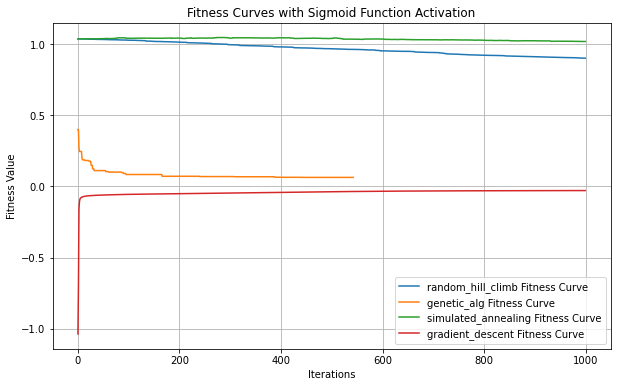

In [5]:
init_state = np.random.randint(2, size=50)
np.random.seed(42)

# train different models
algorithms = ['random_hill_climb', 'genetic_alg', 'simulated_annealing', 'gradient_descent']
fitness_curves = []
accuracy_scores = []

for algo in algorithms:
    # obtain time
    time_start = perf_counter()
    model = mlrose_hiive.NeuralNetwork(
        hidden_nodes=[10], activation='sigmoid', algorithm=algo, max_iters=1000, bias=True,
        is_classifier=True, learning_rate=0.01, early_stopping=True, clip_max=5, max_attempts=100, random_state=42, curve=True
    )
    model.fit(X_train, y_train)
    fit_time = perf_counter() - time_start
    print(f'fit_time for {algo}: {fit_time}')
    
    fitness_curves.append(model.fitness_curve)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Accuracy for {algo}: {accuracy}')
    

# Plot the fitness curves for different algorithms
plt.figure(figsize=(10, 6))
for i, algo in enumerate(algorithms):
    if algo in ['random_hill_climb', 'genetic_alg', 'simulated_annealing']:
        plt.plot(fitness_curves[i][:, 0], label=f'{algo} Fitness Curve')
    else:
        plt.plot(fitness_curves[i], label=f'{algo} Fitness Curve')
plt.xlabel('Iterations')
plt.ylabel('Fitness Value')
plt.title('Fitness Curves with Sigmoid Function Activation')
plt.legend()
plt.grid(True)
plt.show()
 

 

In [ ]:
# additional notes:
# can do jaccard score for all algos to compare accuracy
# use other metrics to compare accuracies 

1

1